In [12]:
import pandas as pd
from matplotlib import pyplot as plt


In [13]:
data_dir = "dataset/heart.csv"
df = pd.read_csv(data_dir)
df = df.dropna()


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

These types all look good, I would change them to ints or floats if they were anything else

According to the documentation, 0 means female and 1 means male

In [16]:
clr = df["sex"].map({0: "female", 1: "male"})

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Duplicated Values
We found comments about the dataset, claiming that there may be duplicate values. Let's search to see if there are indeed duplicates:

In [18]:
# Find and count duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]

print("\nNumber of duplicate rows:", duplicate_count)



Number of duplicate rows: 723


We see that there are 723 duplicates, so let's remove them

In [19]:
df = df.drop_duplicates()

In [20]:
len(df)

302

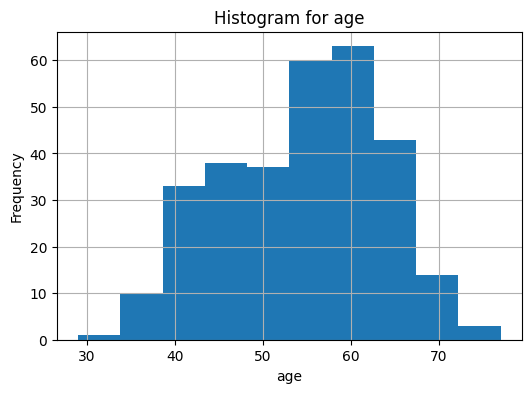

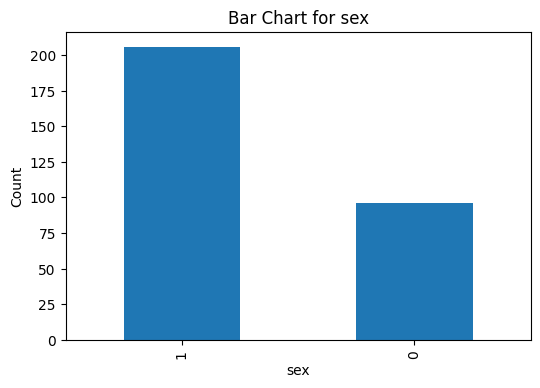

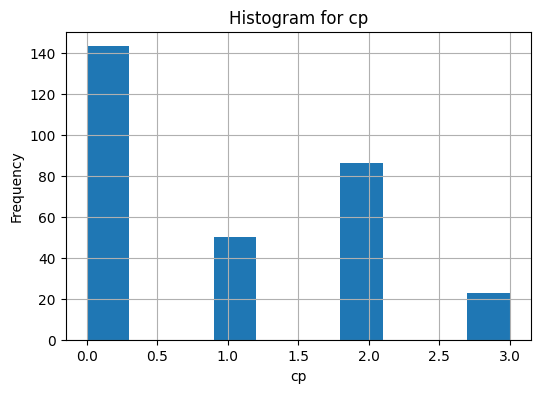

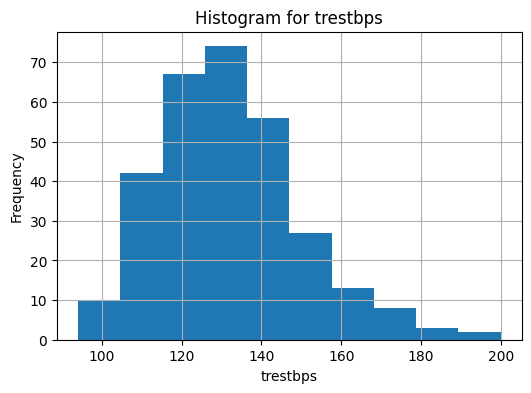

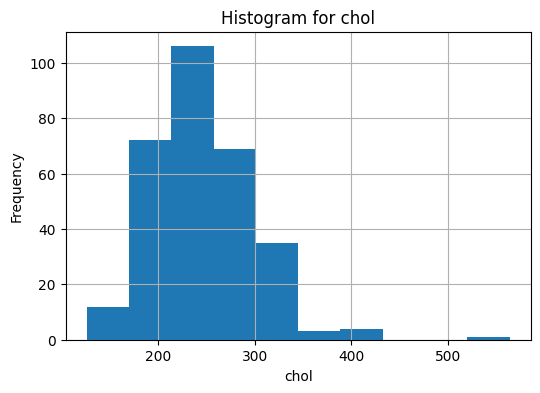

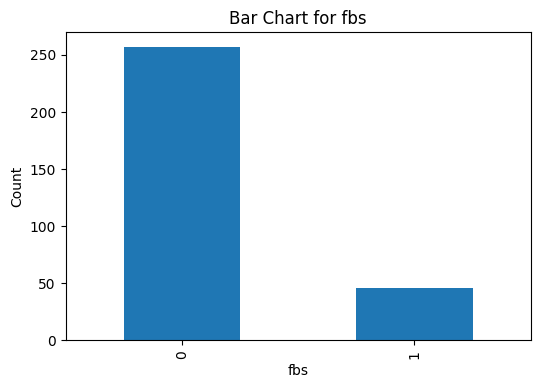

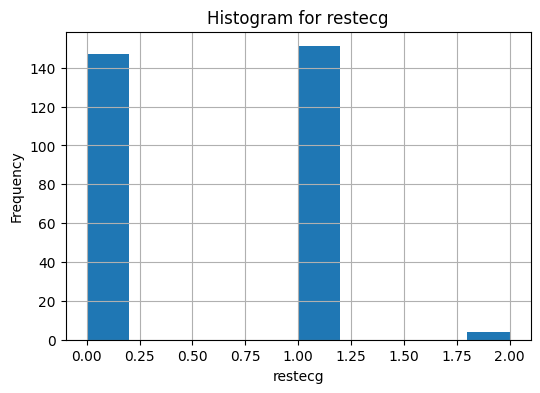

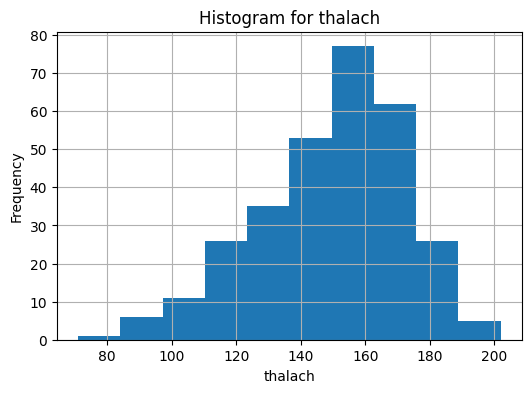

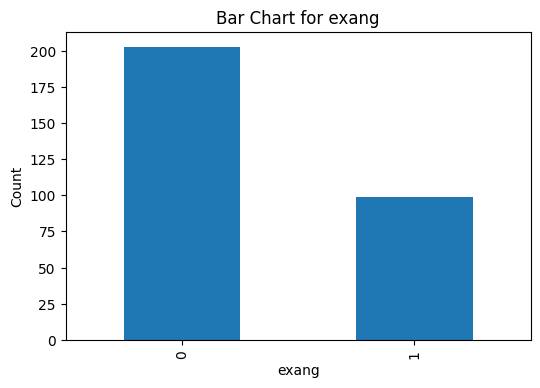

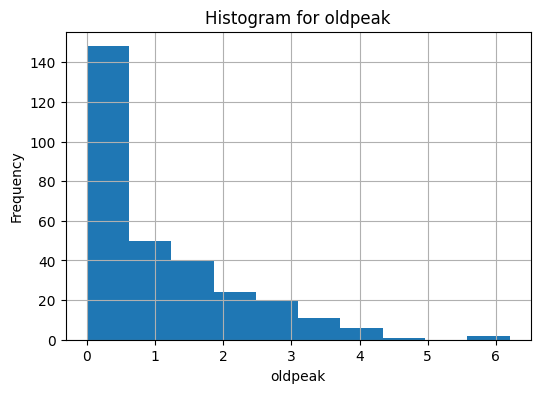

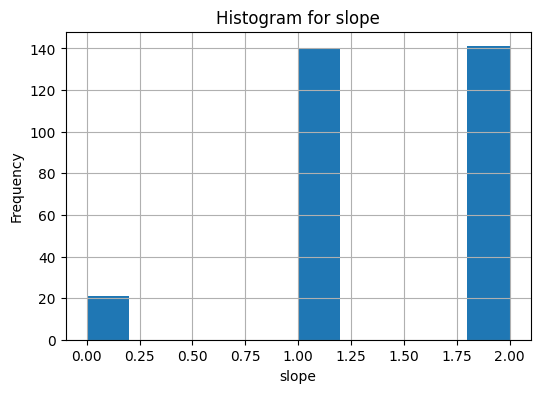

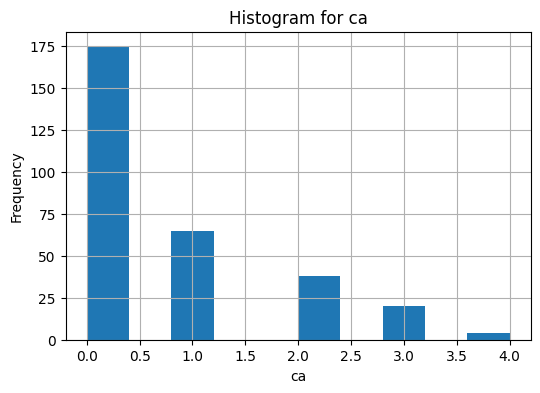

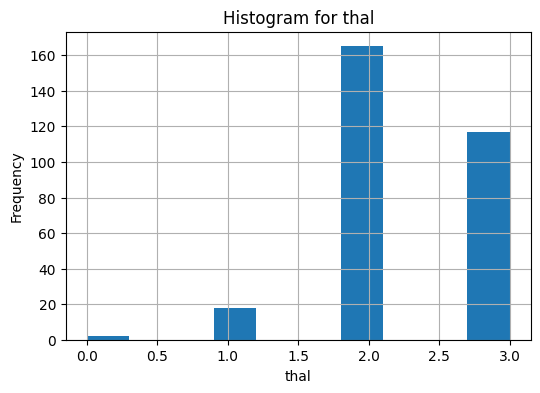

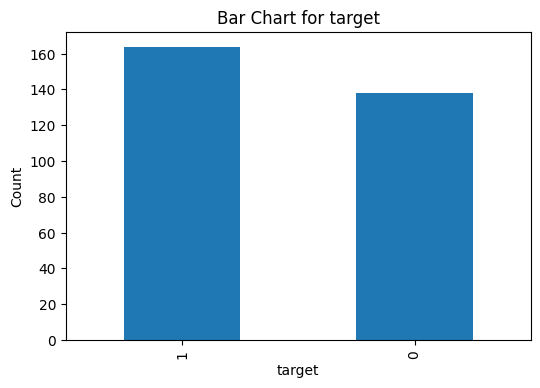

In [21]:
for name in df.columns:
    unique_values = df[name].dropna().unique()
    if set(unique_values).issubset({0, 1}):  # Check if the column is binary
        # Plot as a bar chart
        counts = df[name].value_counts()
        plt.figure(figsize=(6, 4))
        counts.plot(kind='bar')
        plt.title(f'Bar Chart for {name}')
        plt.xlabel(name)
        plt.ylabel('Count')
    else:
        # Plot as a histogram
        plt.figure(figsize=(6, 4))
        df[name].hist(bins=10)
        plt.title(f'Histogram for {name}')
        plt.xlabel(name)
        plt.ylabel('Frequency')
    plt.show()


After looking at these distribution plots, it looks like there are some outliers in the oldpeak, cholesteral, thal, and restecg. To remove data points for numerical data, we remove data points that fall outside of either above the 99th percentile or below the 1st percentile. 

In [24]:
def remove_outliers_numerical(df, threshold=1.5):
    outliers_removed = df.copy()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) & (outliers_removed[column] <= upper_bound)]
    return outliers_removed

print("Shape of the not cleaned dataset:", df.shape)

# Remove outliers from categorical columns

# Remove outliers from the dataset
df_cleaned = remove_outliers_numerical(df)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)
df_cleaned.to_csv('dataset/heart_cleaned.csv', index=False)


Shape of the not cleaned dataset: (302, 14)
Shape of the cleaned dataset: (228, 14)


/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


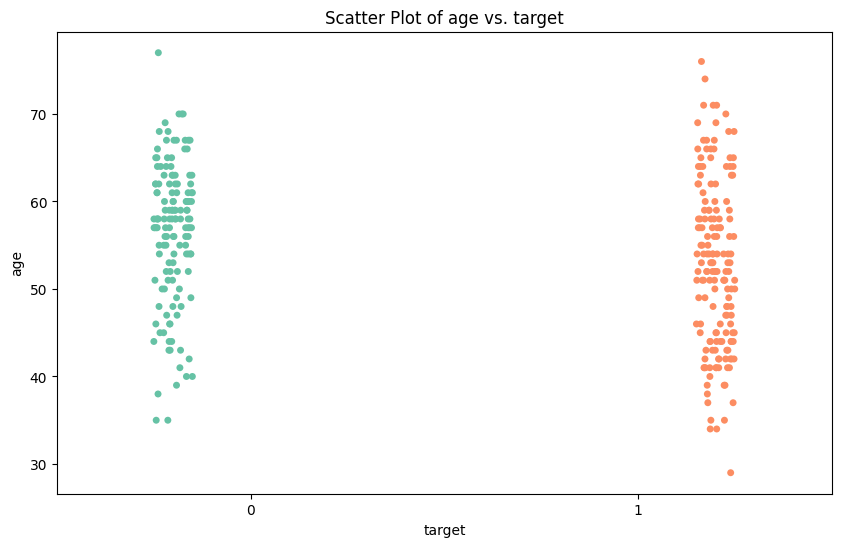

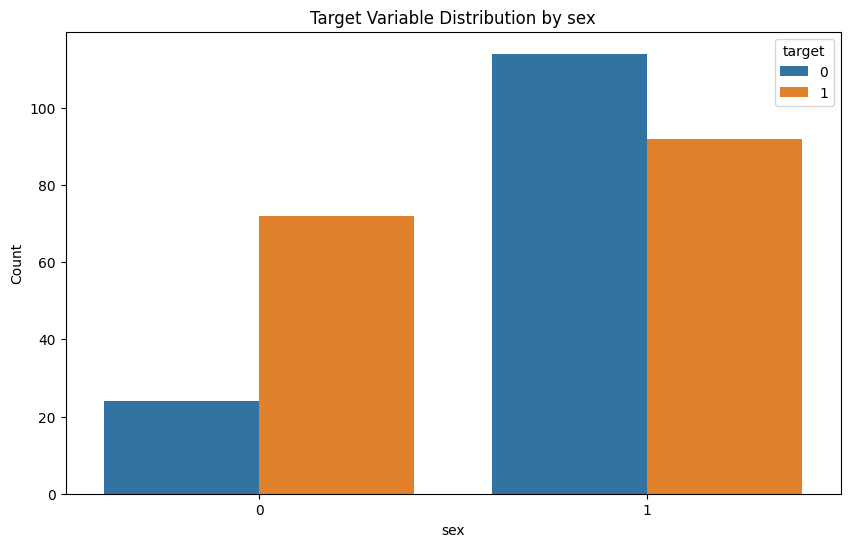

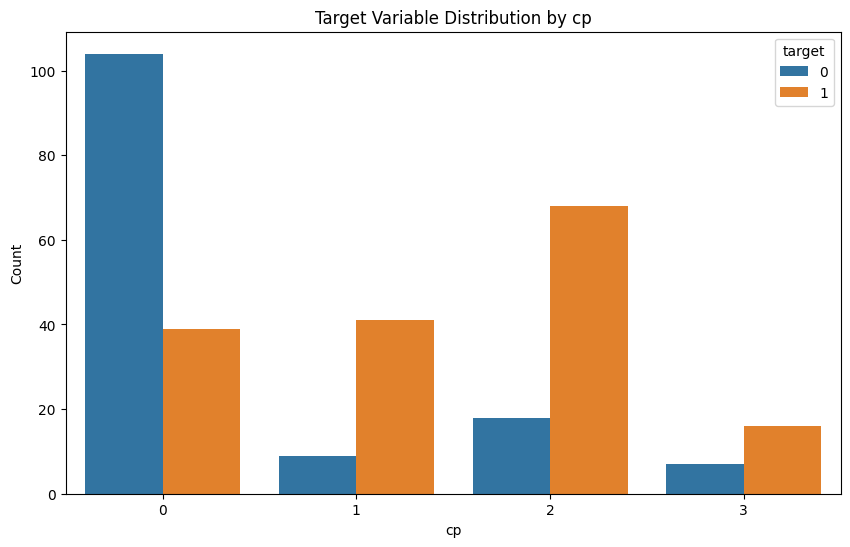

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


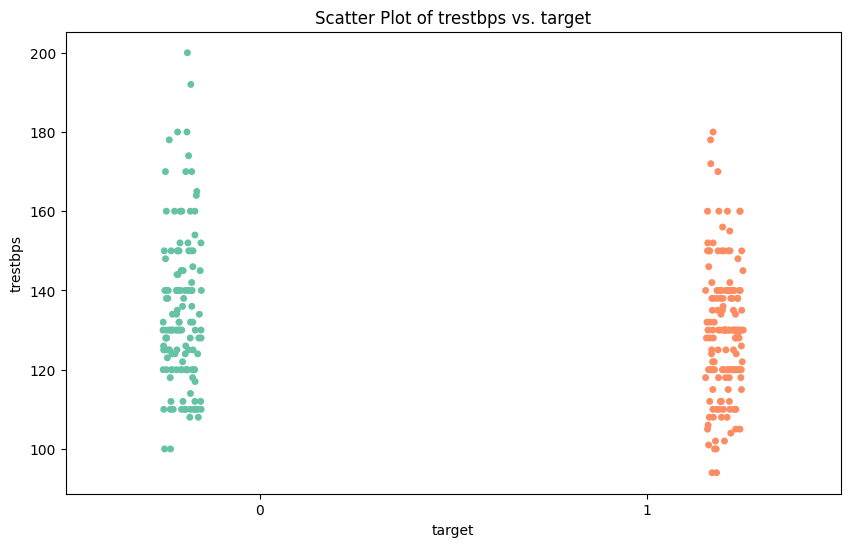

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


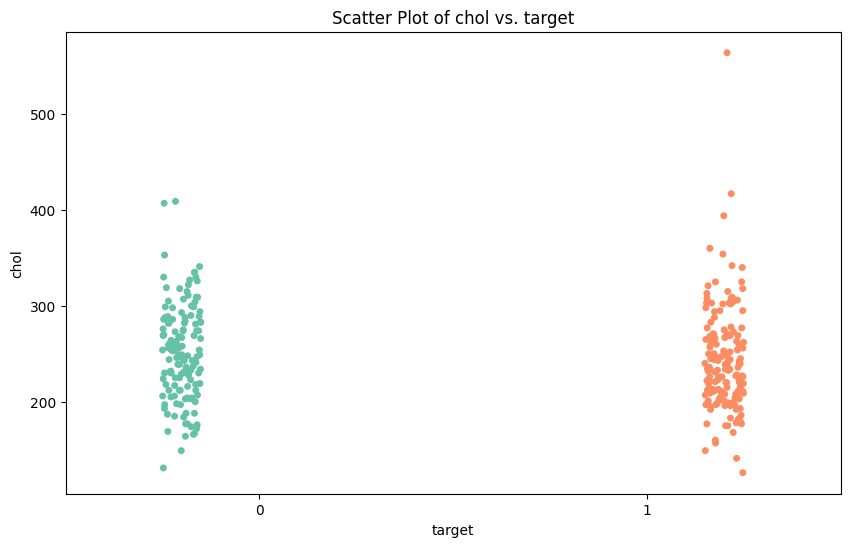

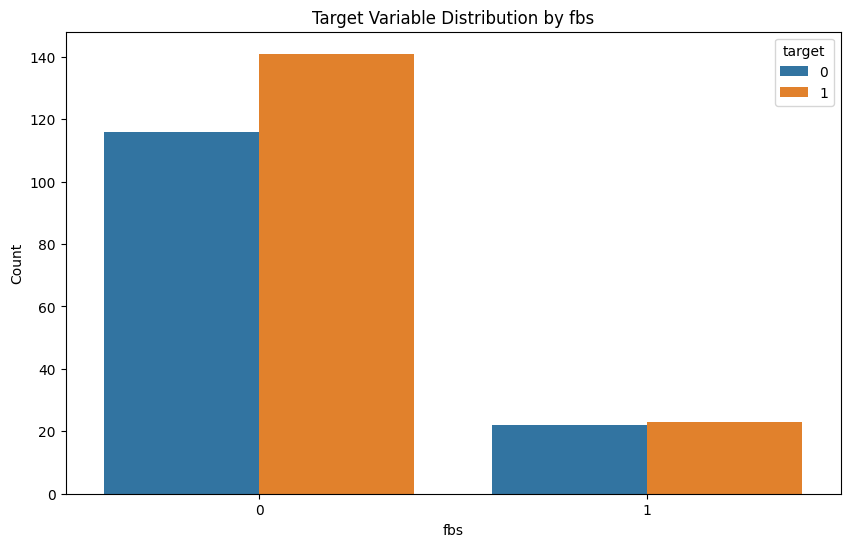

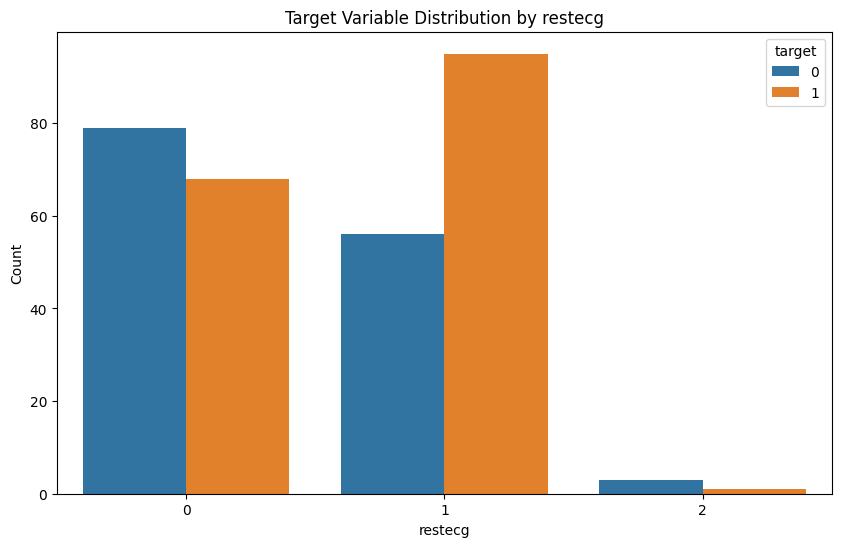

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


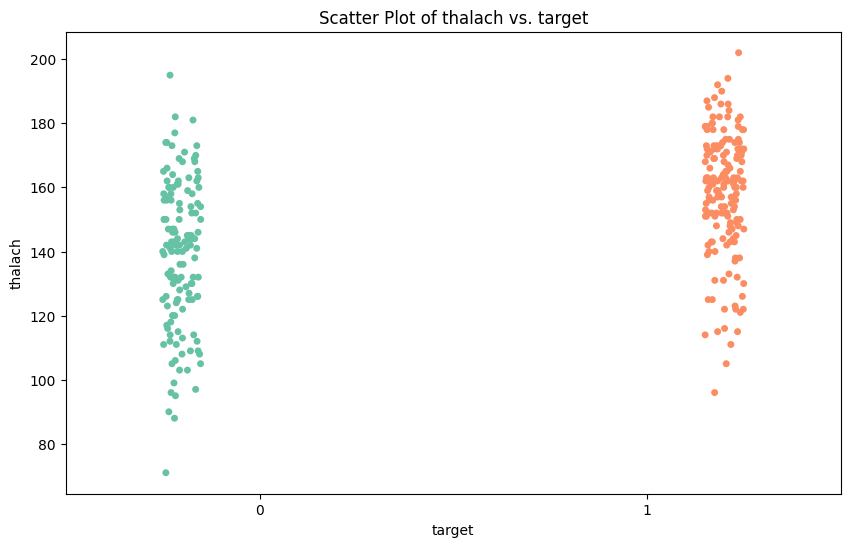

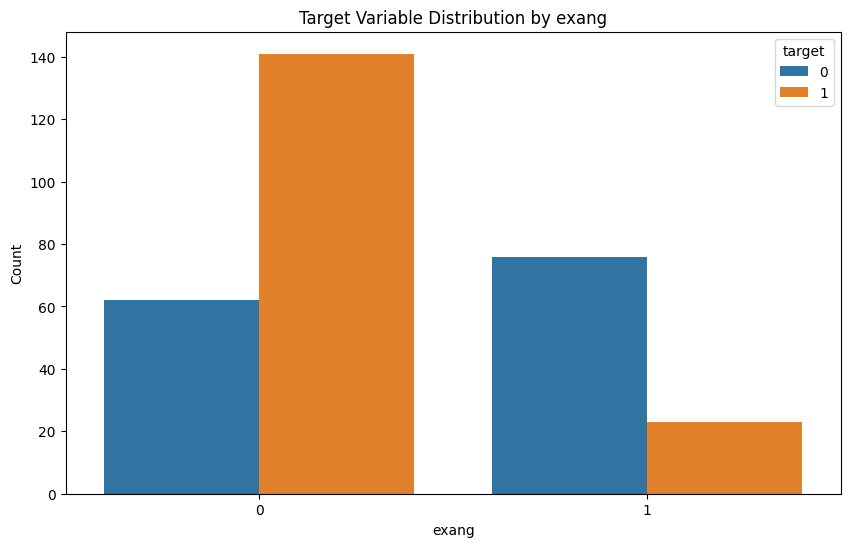

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


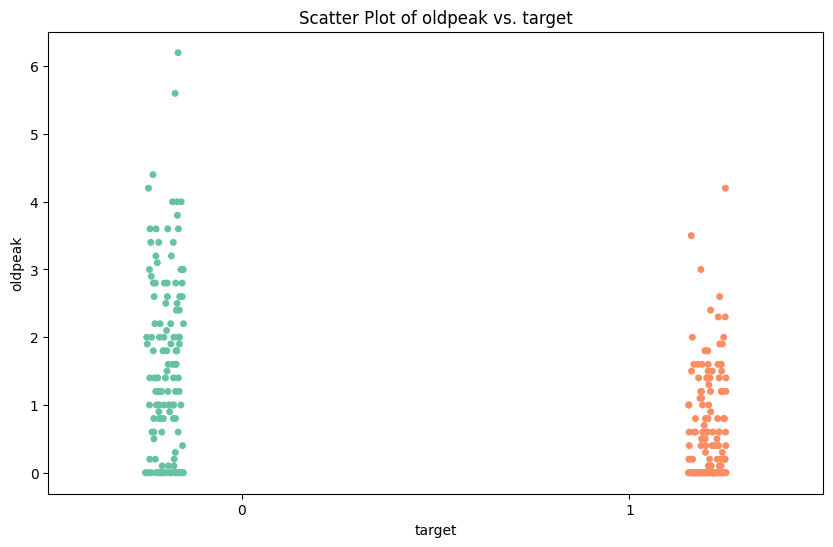

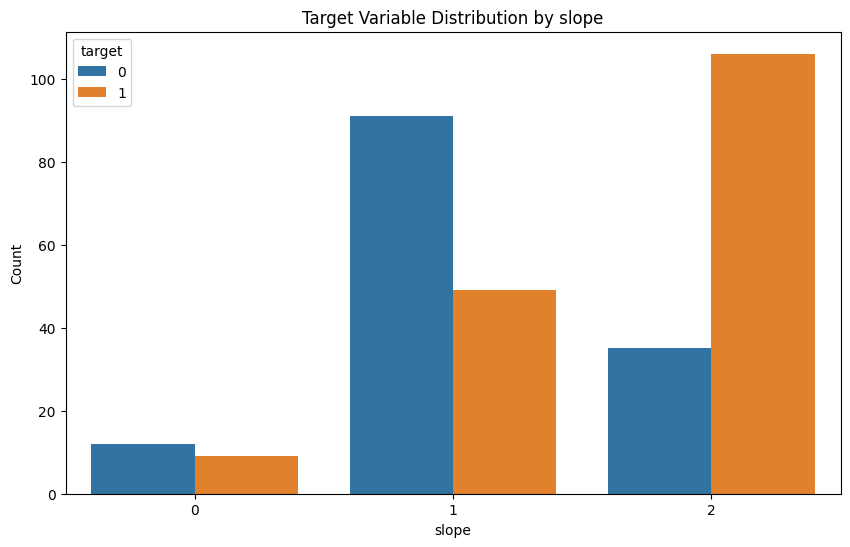

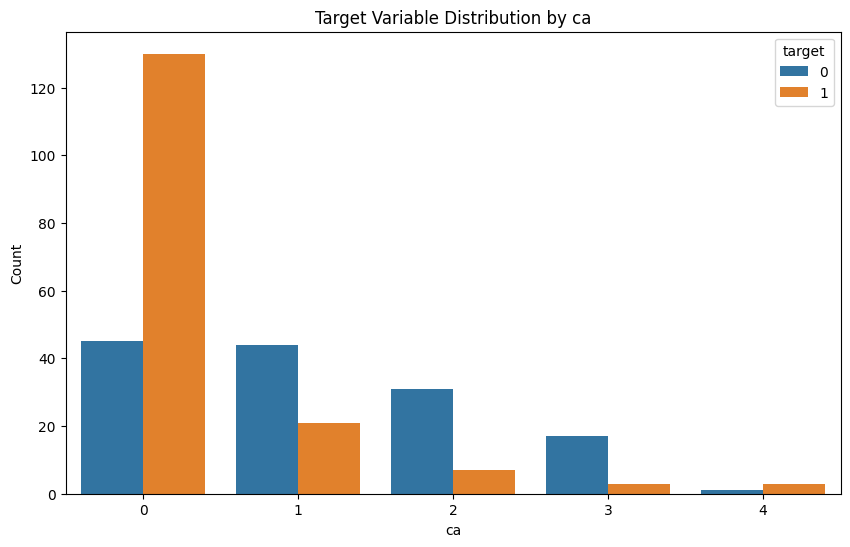

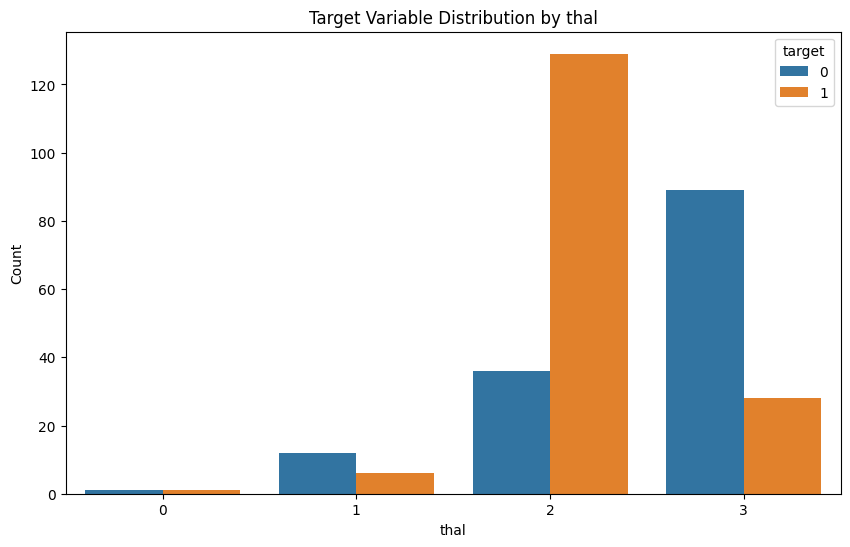

In [ ]:
import seaborn as sns


scatter_plot_columns = ['age', 'trestbps', 'thalach', 'chol', 'oldpeak']

for feature in df.columns:
    if feature != 'target':
        plt.figure(figsize=(10, 6))
        if feature in scatter_plot_columns:
            sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)
            plt.title('Scatter Plot of ' + feature + " vs. target")
            plt.xlabel('target')
            plt.ylabel(feature)
            plt.show()
            
        else:
            sns.countplot(x=feature, hue='target', data=df)
            plt.title(f'Target Variable Distribution by {feature}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.legend(title='target')
        plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

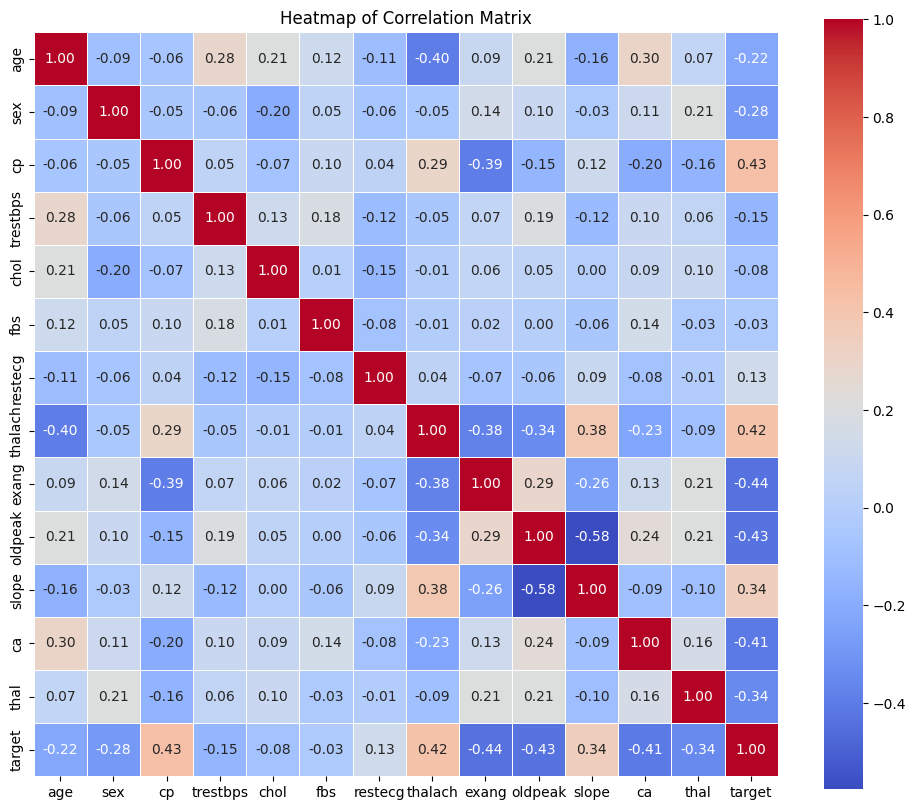

In [ ]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/4289169430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


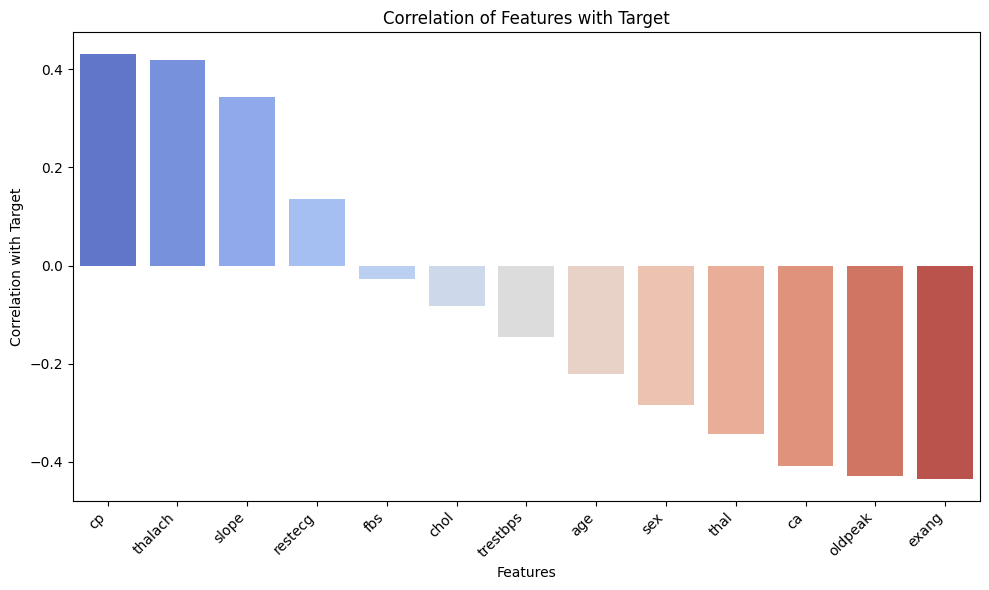

In [ ]:
correlation_with_target = df.corr()['target'].drop('target').sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Selected Features: ['exang', 'cp', 'oldpeak', 'thalach', 'ca']


/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_35937/4230419676.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.loc[final_features].index, y=correlation_with_target.loc[final_features].values, palette='coolwarm')


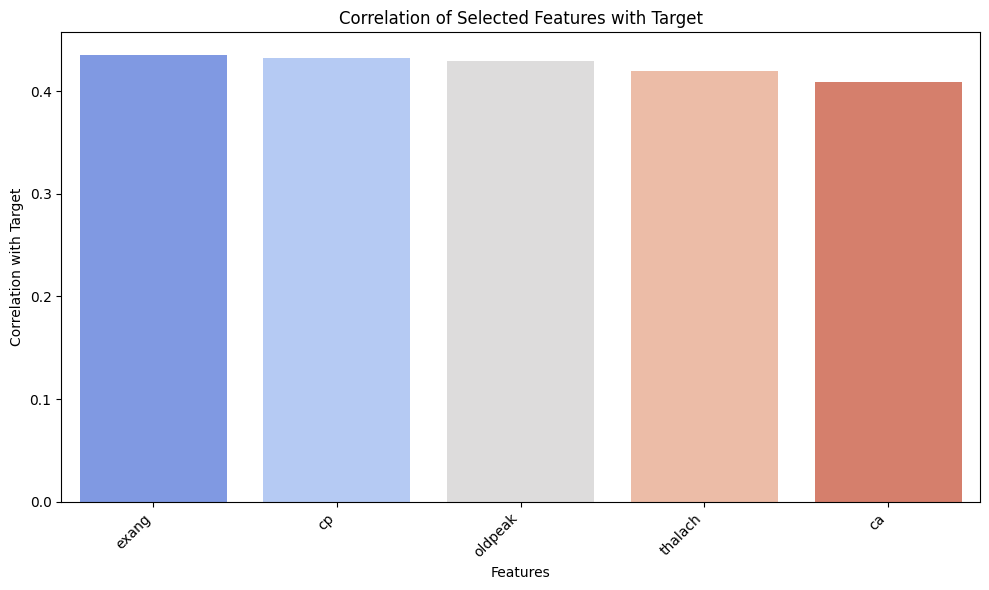

In [ ]:
correlation_with_target = df.corr()['target'].drop('target').abs().sort_values(ascending=False)

# Filter features with correlation >= 0.4
relevant_features = correlation_with_target[correlation_with_target >= 0.40].index

# Create correlation matrix for the relevant features
selected_corr_matrix = df[relevant_features].corr().abs()

# Function to select features with low inter-correlation
def select_features(corr_matrix, threshold=0.41):
    selected_features = []
    for feature in corr_matrix.columns:
        if all(corr_matrix[feature][selected_features] < threshold):
            selected_features.append(feature)
    return selected_features

# Select features with inter-correlation below 0.41
final_features = select_features(selected_corr_matrix)

print("Selected Features:", final_features)

# Create a bar plot for correlation with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.loc[final_features].index, y=correlation_with_target.loc[final_features].values, palette='coolwarm')
plt.title('Correlation of Selected Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

After narrowing down the features to one's whose correlation with the target variable is at least 0.41 and whose correlation with each other variable is less than 0.41, it appears that there are four variables who are highly correlated with the target and lowly correlated with other variables. 